<a href="https://colab.research.google.com/github/PedroOlavo/ArtigosMedium/blob/main/Airbnb_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas que serão usadas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [2]:
#lendo os dados
dados = pd.read_csv('/content/drive/MyDrive/DSNP/airbnb_roma.csv')

# Análise dos dados

In [3]:
print("Entradas:\t {}".format(dados.shape[0]))
print("Variáveis:\t {}\n".format(dados.shape[1]))


Entradas:	 28151
Variáveis:	 16



Na célula acima podemos ver que existem 28151 entrada no nosso dataset, ou seja, este é o número de quartos que podem ser alugados no AirBnb em Roma.

Além disso também passamos a saber que o dataset conta com 16 variáveis.

In [4]:
#descobrindo as colunas, ou seja, as variáveis
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [5]:
dados.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,21,7,7,2015-05-28,0.10,5,365
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,37,1,55,2017-10-31,0.37,3,365
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,94,3,17,2018-10-01,0.14,7,365
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,90,2,142,2020-01-03,1.21,1,364
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,73,2,40,2020-11-22,0.32,2,319


In [6]:
#descobrir qual a porcentagem de dados faltantes em cada variável
#além disso elas serão ordenadas em ordem decrescente
(dados.isnull().sum() / dados.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.226706
last_review                       0.226706
host_name                         0.000391
name                              0.000249
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* Com isso verificamos que a coluna `neighbourhood_group` possui todas as suas entradas sem informação;
* As variáveis `reviews_per_month` e `last_review` possuem cerca de 22,6% dos seus valores ausentes;
* As demais variáveis tem menos que 0,1% dos seus valores ausentes.

In [7]:
colunas_num = []
colunas_num = [colunas for colunas in dados.columns
               if dados[colunas].dtype in ['int64','float64']]

dados[colunas_num].describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.815100e+04,2.815100e+04,0.0,28151.000000,28151.000000,28151.000000,28151.000000,28151.000000,21769.000000,28151.000000,28151.000000
mean,2.260071e+07,9.425779e+07,NaN,41.892762,12.481111,108.706760,3.361834,40.817591,1.149521,6.597172,234.941174
std,1.428754e+07,1.031285e+08,NaN,0.034010,0.046497,322.280649,15.989722,69.634285,1.278964,16.343341,138.716651
min,2.737000e+03,1.822000e+03,NaN,41.657010,12.237730,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.666016e+06,1.262781e+07,NaN,41.886335,12.461575,48.000000,1.000000,1.000000,0.190000,1.000000,92.000000
50%,2.211527e+07,4.550341e+07,NaN,41.896660,12.478380,70.000000,2.000000,9.000000,0.670000,2.000000,295.000000
75%,3.537806e+07,1.599660e+08,NaN,41.906425,12.504590,104.000000,3.000000,51.000000,1.710000,5.000000,363.000000
max,4.708049e+07,3.803965e+08,NaN,42.121740,12.826260,10571.000000,1000.000000,753.000000,19.330000,151.000000,365.000000


Acima conseguimos visualizar várias informações estatísticas bem importantes sobre as variáveis, inclusive algumas delas parecem conter outliers, ou seja, dados muito acima ou muito abaixo dos demais.

Usaremos um gráfico de baixa, boxplot, para tentar confirmar a suspeita de outliers nas colunas `price`e `minimum_nights`.

In [8]:
graf1 = go.Figure(go.Box(y = dados['minimum_nights'],
                         name = ' ',
                         marker={'color':'#31543a'})
)

graf1.update_layout(title='Boxplot do número mínimo de noites para as propriedaes'
                            'disponíveis em Roma no AirBnb.',
                    yaxis_title = 'Número mínimo de noites',
                    template='plotly_white')
graf1.show()

As suspeitas foram muito bem confirmadas, acima podemos ver que a ''caixa'' nem se formou direto por causa da quantidade de outliers presentes na coluna `minimum_nights`. 

Vamos descobrir quantas propriedades ditam que o mínimo de noites seja de ao menos 30.

In [9]:
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(dados[dados.minimum_nights > 30])))
print("{:.4f}%".format((len(dados[dados.minimum_nights > 30]) / dados.shape[0])*100))

minimum_nights: valores acima de 30:
191 entradas
0.6785%


Percebemos que menos de 1% pede que os hospedes fiquem no mínimo 30 dias.

Agora vamos descobrir se a coluna `price` também existem outliers.

In [10]:
graf1 = go.Figure(go.Box(y = dados['price'], 
                        name = ' ',
                         marker = {'color': '#16182e'}))
graf1.update_layout(title='Boxplot dos preços das propriedades disponíveis em Roma',
                    yaxis_title='Preços',
                    template='plotly_white')
graf1.show()

Ficou bem claro que nesse caso também existem muitos dados fora da curva, por isso vamos descobrir quantas propriedades estão com preço acima de 250 euros.

In [11]:
print("{} entradas".format(len(dados[dados.price > 250])))
print("{:.4f}%".format((len(dados[dados.price > 250]) / dados.shape[0])*100))

1304 entradas
4.6322%


1304 hospedagens estão com preço acima de 250, isso corresponde a cerca de 4,6 % dos nossos dados, não seria uma boa decisão jogar fora tanta informação, por isso na etapa seguinte, onde limparemos os dados aumentaremos o limite de 250 euros para ao menos 1000 euros.

In [12]:
print("{} entradas".format(len(dados[dados.price > 1000])))
print("{:.4f}%".format((len(dados[dados.price > 1000]) / dados.shape[0])*100))

111 entradas
0.3943%


Ao mudar nosso limite de 250 euros para 1000 euros, percebmos que apenas 111 hospedagens tem preços maiores que o valor designado e isso representa cerca de 0,4% dos nossos dados, logo jogar fora essa quantidade de dados não impactará tanto no restante da análise.

Agora limparemos os dados, visto que foram encontrados outliers nas colunas `price` e `minimum_nights` . Além disso a coluna `neighbourhood_group`será removida, tendo em vista que não existe nenhuma informação presente na mesma.

In [13]:
dados_limpos = dados.copy()
dados_limpos.drop(dados_limpos[dados_limpos.price > 1000].index, axis=0, inplace=True)
dados_limpos.drop(dados_limpos[dados_limpos.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
dados_limpos.drop('neighbourhood_group', axis=1, inplace=True)

Agora faremos os boxplos novamente, a fim de comparar as mudanças.

In [14]:
graf1 = go.Figure(go.Box(y = dados_limpos['minimum_nights'],
                         name = ' ',
                         marker={'color':'#31543a'})
)

graf1.update_layout(title='Boxplot do número mínimo de noites para as propriedaes'
                            'disponíveis em Roma no AirBnb.',
                    yaxis_title = 'Número mínimo de noites',
                    template='plotly_white')
graf1.show()

In [15]:
graf1 = go.Figure(go.Box(y = dados_limpos['price'], 
                        name = ' ',
                        marker = {'color': '#16182e'}))
graf1.update_layout(title='Boxplot dos preços das propriedades disponíveis em Roma',
                    yaxis_title='Preços',
                    template='plotly_white')
graf1.show()

Agora a visualiação melhorou bastante, e por serem gráficos interativos é possível que a gente se atente ao fato de que a grande maioria das propriedades estimula a quantidade mínima de noites entre 1 e 3 noites.

Já na questão preço, 3 em cada 4 hospedagens tem preços abaixo de 103 euros.

Em seguida vamos observar se há corelação entre as variáveis, ou seja, se existe uma relação entre duas variáveis ou se elas se comportam de modo semelhante.

Essa relação pode ser medida e tem uma itensidade, para visualizarmos melhores essas relações usaremos um `heatmap`, ou mata de calor. Este é um ótimo recurso nesse caso, pois quanto mais "quente", ou seja, quanto maior a corelação, mais forte ou escura a cor fica.

Para chegar no mapa de calor, primeiro criaremos uma matriz de corelação.


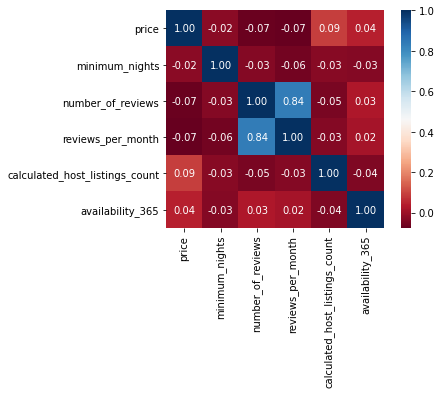

In [16]:
corr = dados_limpos[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A coluna `room_type`indica qual o tipo de locação está sendo anunciada. As locações variam desde quartos compartilhados até casas inteiras.

Tendo isso em mente vamos descobrir qual tipo de locação é a mais oferecida em Roma.

In [17]:
dados_limpos['room_type'].value_counts()

Entire home/apt    17533
Private room        8840
Hotel room          1286
Shared room          192
Name: room_type, dtype: int64

Nesse caso o tipo de imóvel que mais se faz presente são casas inteiras.
Geralmente, esse tipo de acomodação conta com quarto, banheiro, cozinha e entrada separada e exclusiva.

Agora nosso foco será descobrir quais locais são mais caros em Roma, os resultados dos dez bairos com maior preço são mostrado a seguir.

In [18]:
dados_limpos.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              111.252252
XV Cassia/Flaminia             93.755952
XIII Aurelia                   86.684758
II Parioli/Nomentano           82.827869
IX Eur                         81.088496
XII Monte Verde                78.398217
XIV Monte Mario                77.295848
X Ostia/Acilia                 71.710280
VII San Giovanni/Cinecittà     70.881935
III Monte Sacro                67.058411
Name: price, dtype: float64

In [19]:
dados_limpos['neighbourhood'].value_counts()

I Centro Storico              14989
VII San Giovanni/Cinecittà     2109
II Parioli/Nomentano           1952
XIII Aurelia                   1732
XII Monte Verde                1346
V Prenestino/Centocelle        1101
VIII Appia Antica               799
X Ostia/Acilia                  642
XIV Monte Mario                 578
XI Arvalia/Portuense            539
IV Tiburtina                    537
XV Cassia/Flaminia              504
III Monte Sacro                 428
IX Eur                          339
VI Roma delle Torri             256
Name: neighbourhood, dtype: int64

É interessante notar que justamente a localidade com maior número de hospedagens oferecidas seja a que tenha a média de preços mais alta.

Provavelmente tal fato se dá por se tratar do centro histórico da cidade, onde há diversos locais históricos  e áreas para compras e referições. Entre as várias atrações históricas do bairro encontram-se um templo dedicado aos deuses romanos que data do século II e é uma das construções da antiguidade mais bem preservadas de Roma.

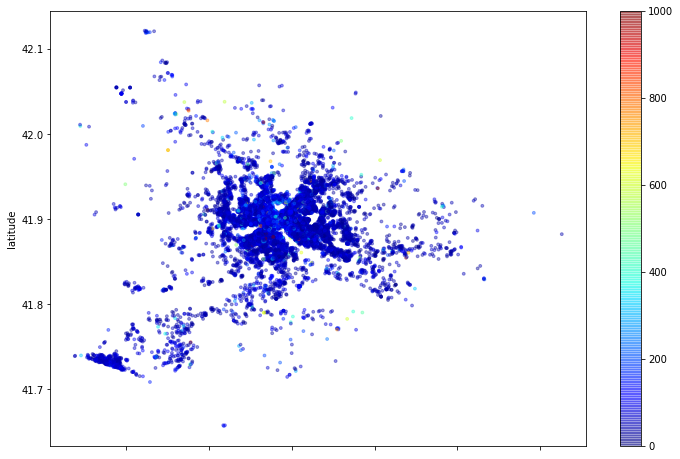

In [20]:
dados_limpos.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=dados_limpos['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# Conclusão

Feita apenas essa análise básica dos dados da Airbnb em Roma foi descoberta a presença de vários outliers em algumas das colunas.

Também foi notável o fato de uma coluna inteira não ter nenhuma informação.

Outrossim é válido destacar que mais da metade das locacões disponíveis na cidade são casas ou apartamentos inteiros, com cozinha, banheiro e afins, o que pode ser bastante agradável para casais ou famílias de férias.

Além disso foi muito interessante notar que o Centro Histórico de Roma é o local mais procurado para hospedagem, mesmo tendo em média os preços mais altos da cidade, tal fato provavelmente se dá pelas atrações históricas e pelas facilidades que a região central oferece.

Por fim, é importante ressaltar que a base dados usada é uma versão resumida  e que para uma análise mais profunda é recomendável usar o dataset completo.
